# The analysis for the presentation for the 05/03/2024

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np


In [3]:
def path_translator(experiement_name):

    result_folder = Path("../Simulation_results/")
    file_name = "analyzed_" + experiement_name + ".csv"
    results_path = result_folder / experiement_name / file_name

    return results_path

In [38]:
experiment_name = "Exponential_weight"
file_path = path_translator(experiment_name)
data = pd.read_csv(file_path)
data = data[data["n_patients"] >= 500]
data.columns

Index(['Unnamed: 0', 'weight_function', 'n_patients', 'n_bootstraps', 'cutoff',
       'HR_target', 'HR_calculated_GPU_bootstraps',
       'HR_calculated_GPU_bootstraps_2_5', 'HR_calculated_GPU_bootstraps_97_5',
       'BIC_results', 'nknots'],
      dtype='object')

In [24]:
experiment_name = "Exponential_weight"
file_path = path_translator(experiment_name)
data = pd.read_csv(file_path)
data = data[data["n_patients"] >= 500]

print(len(data))

data_min_bic = data.loc[data.groupby(['n_patients', 'HR_target'])['BIC_results'].idxmin()]




# experiment_name = "HR : 2, patients : 100 - 100 000"
# file_path = path_translator(experiment_name)
# print(file_path)
# data2 = pd.read_csv(file_path)
# data = pd.concat([data1,data2])
# data


96


In [58]:
HR_target = 2
n_patients = 100000
test_df = data_min_bic[data_min_bic["n_patients"] == n_patients ]
test_df = test_df[test_df["HR_target"] == HR_target ]
test_df

,Unnamed: 0,weight_function,n_patients,n_bootstraps,cutoff,HR_target,HR_calculated_GPU_bootstraps,HR_calculated_GPU_bootstraps_2_5,HR_calculated_GPU_bootstraps_97_5,BIC_results,nknots
78,79,exponential_weight,100000,1000,180,2.0,2.036962,1.960074,2.11594,1.566052e+06,2


In [59]:
comparison_df = data[data["n_patients"] == n_patients ]
comparison_df = comparison_df[comparison_df["HR_target"] == HR_target ]
comparison_df

,Unnamed: 0,weight_function,n_patients,n_bootstraps,cutoff,HR_target,HR_calculated_GPU_bootstraps,HR_calculated_GPU_bootstraps_2_5,HR_calculated_GPU_bootstraps_97_5,BIC_results,nknots
38,39,exponential_weight,100000,1000,180,2.0,2.005854,1.944622,2.075364,1.566679e+06,1
78,79,exponential_weight,100000,1000,180,2.0,2.036962,1.960074,2.115940,1.566052e+06,2
118,119,exponential_weight,100000,1000,180,2.0,2.065062,1.987129,2.155217,1.566352e+06,3


In [25]:
experiment_name = "Null_weight"
file_path = path_translator(experiment_name)
data_null = pd.read_csv(file_path)
data_null = data_null[data_null["nknots"] ==1]

In [21]:
def plot_HR(ax,data,HR_target):
    sub_data = data[data["HR_target"]==HR_target]
    # sub_data = sub_data[sub_data["n_patients"] > 100]
    n_patients = list(sub_data["n_patients"].unique())
    means = sub_data["HR_calculated_GPU_bootstraps"]
    lowers = list(sub_data["HR_calculated_GPU_bootstraps_2_5"])
    highers = list(sub_data["HR_calculated_GPU_bootstraps_97_5"])

    print(n_patients)

    minlower = min(lowers)
    maxhigher = max(highers)

    errors =  [means - lowers, highers - means]
    ax.errorbar(n_patients, means, yerr=errors, fmt='o', capsize=5, color ="black",label = "Calculated result")


    return ax, minlower, maxhigher



In [61]:
def plot_HR_simple(data,HR_target):
    sub_data = data[data["HR_target"]==HR_target]
    sub_data = sub_data[sub_data["n_patients"] > 100]
    n_patients = list(sub_data["n_patients"].unique())
    means = sub_data["HR_calculated_GPU_bootstraps"]
    lowers = list(sub_data["HR_calculated_GPU_bootstraps_2_5"])
    highers = list(sub_data["HR_calculated_GPU_bootstraps_97_5"])


    errors =  [means - lowers, highers - means]


    plt.errorbar(n_patients, means, yerr=errors, fmt='o', capsize=5, color ="black",label = "Calculated result")

    plt.axhline(y=HR_target, color='grey', linestyle='dashed', label = 'HR target')
    plt.ylabel("HR")
    plt.xlabel("Number of patients")
    plt.legend()
    plt.xscale('log')



In [31]:
experiment_name = "Exponential_weight"
file_path = path_translator(experiment_name)
data = pd.read_csv(file_path)
data = data[data["n_patients"] >= 500]

print(len(data))

data_min_bic = data.loc[data.groupby(['n_patients', 'HR_target'])['BIC_results'].idxmin()]

experiment_name = "Null_weight"
file_path = path_translator(experiment_name)
data_null = pd.read_csv(file_path)
data_null_min_bic = data_null.loc[data_null.groupby(['n_patients', 'HR_target'])['BIC_results'].idxmin()]



96


[100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
[500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
[500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
[500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
[500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]


Text(0.5, 1.0, 'Target HR: 2.8')

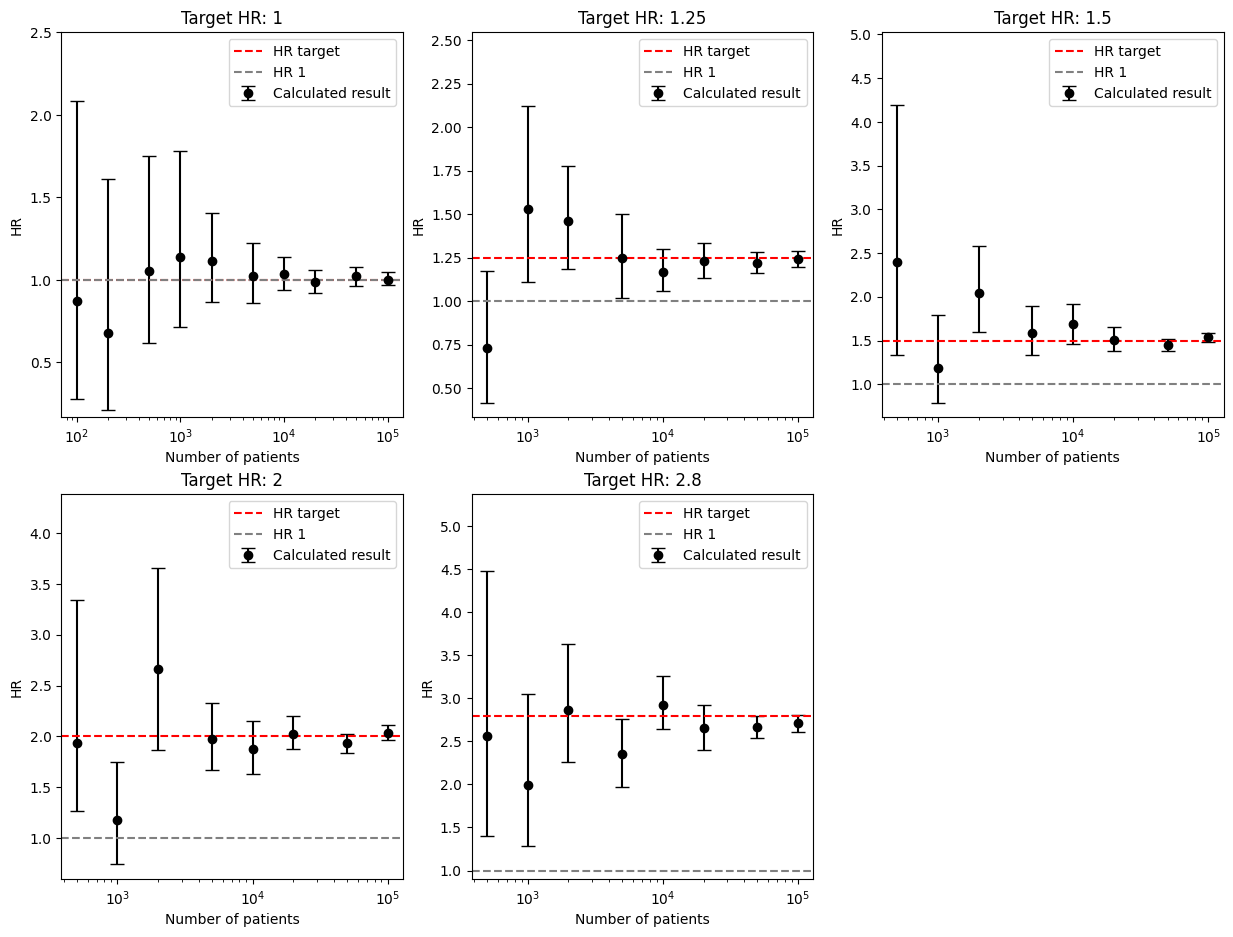

In [32]:

plt.figure(figsize=(15, 11))

##############""
HR_target = 1
ax = plt.subplot(2, 3, 1) 
ax, min_lower, max_higher = plot_HR(ax,data_null_min_bic,HR_target)

plt.axhline(y=HR_target, color='red', linestyle='dashed', label = 'HR target')
plt.axhline(y=1, color='grey', linestyle='dashed', label = 'HR 1')
plt.ylim(min(0.9,min_lower * 0.8),max_higher * 1.2)

plt.ylabel("HR")
plt.xlabel("Number of patients")
plt.legend()
plt.xscale('log')
plt.title(f"Target HR: {HR_target}")



HR_target = 1.25
ax = plt.subplot(2,3, 2) 
ax, min_lower, max_higher = plot_HR(ax,data_min_bic,HR_target)

plt.axhline(y=HR_target, color='red', linestyle='dashed', label = 'HR target')
plt.axhline(y=1, color='grey', linestyle='dashed', label = 'HR 1')
plt.ylim(min(0.9,min_lower * 0.8),max_higher * 1.2)
plt.ylabel("HR")
plt.xlabel("Number of patients")
plt.legend()
plt.xscale('log')
plt.title(f"Target HR: {HR_target}")


##############
HR_target = 1.5
ax = plt.subplot(2, 3, 3) 
ax, min_lower, max_higher = plot_HR(ax,data_min_bic,HR_target)

plt.axhline(y=HR_target, color='red', linestyle='dashed', label = 'HR target')
plt.axhline(y=1, color='grey', linestyle='dashed', label = 'HR 1')
plt.ylim(min(0.9,min_lower * 0.8),max_higher * 1.2)



plt.ylabel("HR")
plt.xlabel("Number of patients")
plt.legend()
plt.xscale('log')
plt.title(f"Target HR: {HR_target}")


###########
HR_target = 2
ax = plt.subplot(2, 3, 4) 
ax, min_lower, max_higher = plot_HR(ax,data_min_bic,HR_target)


plt.axhline(y=HR_target, color='red', linestyle='dashed', label = 'HR target')
plt.axhline(y=1, color='grey', linestyle='dashed', label = 'HR 1')
plt.ylim(min(0.9,min_lower * 0.8),max_higher * 1.2)

plt.ylabel("HR")
plt.xlabel("Number of patients")
plt.legend()
plt.xscale('log')
plt.title(f"Target HR: {HR_target}")


##############""
HR_target = 2.8
ax = plt.subplot(2, 3, 5) 
ax, min_lower, max_higher = plot_HR(ax,data_min_bic,HR_target)



plt.axhline(y=HR_target, color='red', linestyle='dashed', label = 'HR target')
plt.axhline(y=1, color='grey', linestyle='dashed', label = 'HR 1')
plt.ylim(min(0.9,min_lower * 0.8),max_higher * 1.2)

plt.ylabel("HR")
plt.xlabel("Number of patients")
plt.legend()
plt.xscale('log')
plt.title(f"Target HR: {HR_target}")







In [33]:
experiment_name = "Exponential_weight"
file_path = path_translator(experiment_name)
data = pd.read_csv(file_path)
data = data[data["n_patients"] >= 200]


data_min_bic = data.loc[data.groupby(['n_patients', 'HR_target'])['BIC_results'].idxmin()]



experiment_name = "Null_weight"
file_path = path_translator(experiment_name)
data_null = pd.read_csv(file_path)
# data_null = data_null[data_null["n_patients"] >= 500]
data_null_min_bic = data_null.loc[data_null.groupby(['n_patients', 'HR_target'])['BIC_results'].idxmin()]




[100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
[200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
[200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
[200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
[200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]


Text(0.5, 1.0, 'Target HR: 2.8')

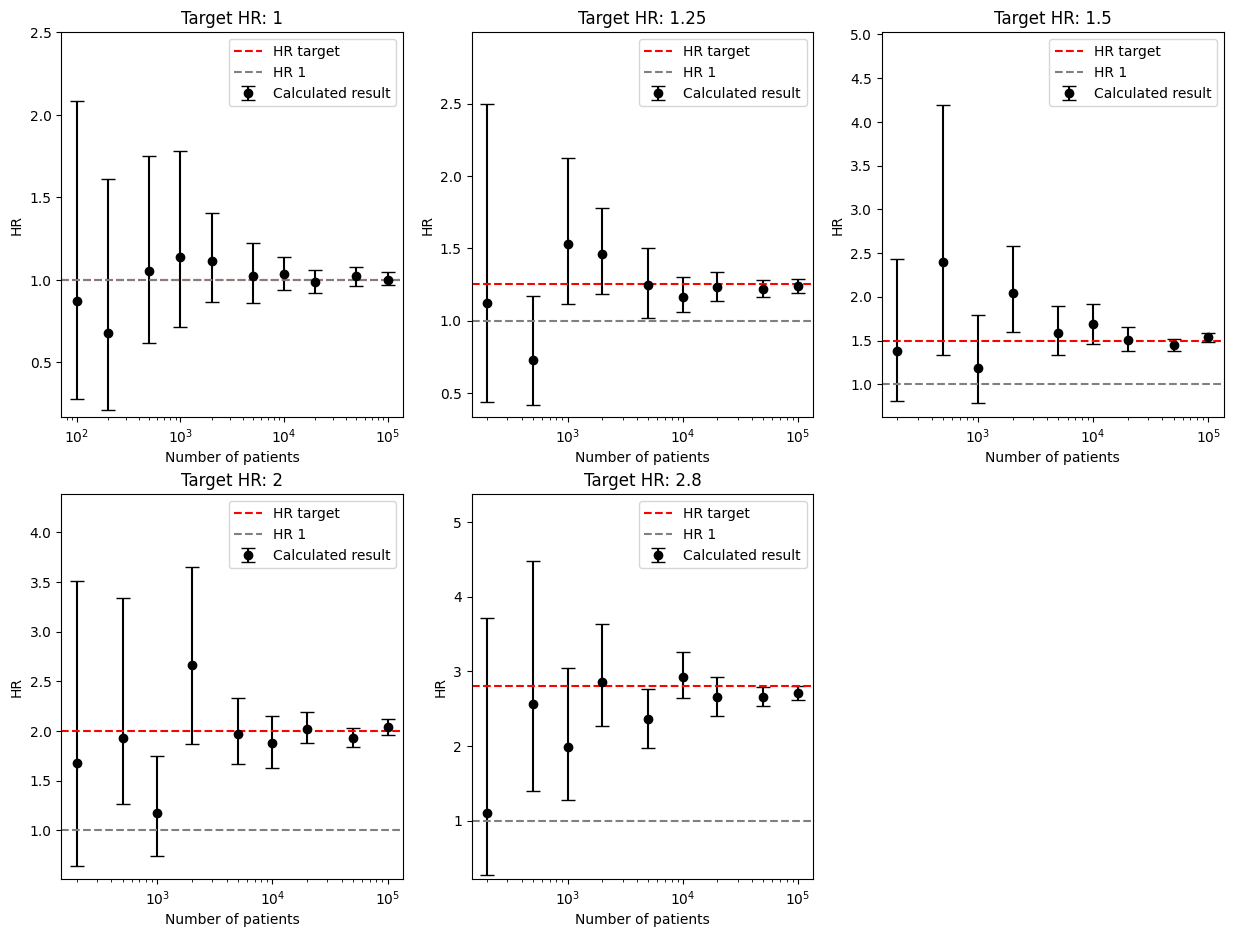

In [34]:
plt.figure(figsize=(15, 11))

##############""
HR_target = 1
ax = plt.subplot(2, 3, 1) 
ax, min_lower, max_higher = plot_HR(ax,data_null_min_bic,HR_target)

plt.axhline(y=HR_target, color='red', linestyle='dashed', label = 'HR target')
plt.axhline(y=1, color='grey', linestyle='dashed', label = 'HR 1')
plt.ylim(min(0.9,min_lower * 0.8),max_higher * 1.2)

plt.ylabel("HR")
plt.xlabel("Number of patients")
plt.legend()
plt.xscale('log')
plt.title(f"Target HR: {HR_target}")



HR_target = 1.25
ax = plt.subplot(2,3, 2) 
ax, min_lower, max_higher = plot_HR(ax,data_min_bic,HR_target)

plt.axhline(y=HR_target, color='red', linestyle='dashed', label = 'HR target')
plt.axhline(y=1, color='grey', linestyle='dashed', label = 'HR 1')
plt.ylim(min(0.9,min_lower * 0.8),max_higher * 1.2)
plt.ylabel("HR")
plt.xlabel("Number of patients")
plt.legend()
plt.xscale('log')
plt.title(f"Target HR: {HR_target}")


##############
HR_target = 1.5
ax = plt.subplot(2, 3, 3) 
ax, min_lower, max_higher = plot_HR(ax,data_min_bic,HR_target)

plt.axhline(y=HR_target, color='red', linestyle='dashed', label = 'HR target')
plt.axhline(y=1, color='grey', linestyle='dashed', label = 'HR 1')
plt.ylim(min(0.9,min_lower * 0.8),max_higher * 1.2)



plt.ylabel("HR")
plt.xlabel("Number of patients")
plt.legend()
plt.xscale('log')
plt.title(f"Target HR: {HR_target}")


###########
HR_target = 2
ax = plt.subplot(2, 3, 4) 
ax, min_lower, max_higher = plot_HR(ax,data_min_bic,HR_target)


plt.axhline(y=HR_target, color='red', linestyle='dashed', label = 'HR target')
plt.axhline(y=1, color='grey', linestyle='dashed', label = 'HR 1')
plt.ylim(min(0.9,min_lower * 0.8),max_higher * 1.2)

plt.ylabel("HR")
plt.xlabel("Number of patients")
plt.legend()
plt.xscale('log')
plt.title(f"Target HR: {HR_target}")


##############""
HR_target = 2.8
ax = plt.subplot(2, 3, 5) 
ax, min_lower, max_higher = plot_HR(ax,data_min_bic,HR_target)



plt.axhline(y=HR_target, color='red', linestyle='dashed', label = 'HR target')
plt.axhline(y=1, color='grey', linestyle='dashed', label = 'HR 1')
plt.ylim(min(0.9,min_lower * 0.8),max_higher * 1.2)

plt.ylabel("HR")
plt.xlabel("Number of patients")
plt.legend()
plt.xscale('log')
plt.title(f"Target HR: {HR_target}")

